## __whatliesの使い方__

- 単語の分散表現が簡単に得られるライブラリ

- Github: https://github.com/koaning/whatlies/

- 公式ドキュメント: https://koaning.github.io/whatlies/


In [1]:
# 再起動を要求される場合がある
!pip install whatlies[all] | tail -n 1

In [2]:
import matplotlib.pyplot as plt

### __モデル準備__

- ここではHugginface Transformersのbert-base-uncasedを使用する

- どのライブラリを使用するかで読み込む時のクラスが異なる

In [3]:
from whatlies.language import HFTransformersLanguage

model = HFTransformersLanguage('bert-base-cased')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### __Embedding__

- 単一の単語ベクトルオブジェクト

In [4]:
# 単語ベクトル
vec = model["man"]
vec

Emb[man]

In [5]:
vec.vector

array([ 7.35702276e-01, -8.53750646e-01,  2.75138587e-01, -2.63032377e-01,
       -4.88841146e-01,  1.54976174e-01,  2.49472976e-01, -2.26361096e-01,
        4.15411033e-03, -1.10293436e+00, -3.94659713e-02,  5.84293723e-01,
       -4.57021147e-01,  2.47342229e-01, -6.10680401e-01,  5.09065628e-01,
        9.60807279e-02,  4.80557680e-01,  1.77223474e-01, -2.61685938e-01,
        2.10271686e-01, -2.98628688e-01,  7.35670745e-01, -5.04213035e-01,
       -8.31782743e-02,  1.87999055e-01,  7.00842381e-01,  3.77140939e-01,
       -9.72958922e-01,  2.64147818e-01, -3.84708084e-02,  3.53861392e-01,
        1.14613570e-01,  9.45687145e-02, -8.59551370e-01, -1.21511310e-01,
        2.53698975e-01,  1.31355792e-01,  9.72172171e-02, -6.47867396e-02,
       -4.60057437e-01, -2.56427564e-03,  5.02052546e-01, -3.50374788e-01,
       -3.43052775e-01, -2.05958068e-01,  2.51644347e-02,  3.12913328e-01,
       -5.87850153e-01,  2.23781615e-01,  2.54003495e-01, -3.30451995e-01,
        1.86404720e-01,  

In [6]:
vec.ndim # 次元数

768

In [7]:
vec.name # 名前

'man'

In [8]:
# コサイン類似度
vec.distance(model["woman"])

0.032624599501395735

Emb[man]

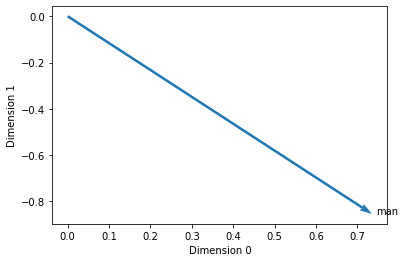

In [9]:
# plotで可視化
# ベクトルの0, 1次元目

vec.plot()

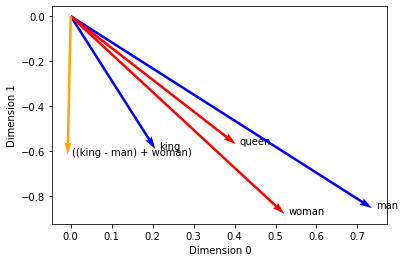

In [10]:
# ベクトルの0, 1次元目

model["man"].plot(color="blue")
model["woman"].plot(color="red")
model["king"].plot(color="blue")
model["queen"].plot(color="red")
(model["king"] - model["man"] + model["woman"]).plot(color="orange", show_ops=True)

plt.show()

### __Embeddings__

- 単語ベクトルのセット

In [11]:
words = [
    "man",
    "woman",
    "mother",
    "father",
    "brother",
    "sister",
    "nurse",
    "president"
]

embeddings = model[words]
embeddings

EmbSet

In [12]:
# 辞書
embeddings.embeddings

{'man': Emb[man],
 'woman': Emb[woman],
 'mother': Emb[mother],
 'father': Emb[father],
 'brother': Emb[brother],
 'sister': Emb[sister],
 'nurse': Emb[nurse],
 'president': Emb[president]}

In [14]:
embeddings.ndim # 次元数

768

In [15]:
# embeddingsの中からvecとのコサイン類似度が最も高いトップ5つを取り出す
n = 5
top_n =  embeddings.embset_similar(vec, n=n)
top_n.embeddings

{'man': Emb[man],
 'woman': Emb[woman],
 'nurse': Emb[nurse],
 'mother': Emb[mother],
 'brother': Emb[brother]}

In [16]:
# pd.DataFrameに変換
embeddings.to_dataframe()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
man,0.735702,-0.853751,0.275139,-0.263032,-0.488841,0.154976,0.249473,-0.226361,0.004154,-1.102934,...,0.205677,0.174648,-0.076789,0.081606,-0.142245,-0.084660,0.468443,-0.400537,0.378496,-0.058804
woman,0.521913,-0.879266,0.060370,-0.176487,-0.540108,0.215018,0.111524,-0.278458,0.100437,-1.330511,...,0.261293,0.335453,-0.051299,-0.008677,-0.197600,0.263881,0.381820,-0.562843,0.427173,0.170795
mother,0.713956,-0.488438,0.494171,-0.416265,-0.478481,0.221047,0.292241,-0.140585,0.425156,-1.416261,...,0.517102,0.209877,-0.410970,0.034689,0.125349,0.386220,0.458891,-0.249502,0.183645,0.132165
father,0.722235,-0.547676,0.605546,-0.388732,-0.474591,0.240334,0.223540,-0.117277,0.376108,-1.477076,...,0.508865,0.226729,-0.280439,-0.071649,0.030589,0.359194,0.439264,-0.334525,0.222363,0.125289
brother,0.708300,-0.526910,0.619008,-0.661505,-0.375360,0.031324,0.272441,-0.290881,0.371223,-1.412667,...,0.495953,0.263610,-0.323919,0.192368,-0.204430,0.336483,0.150105,-0.793313,0.132177,0.150516
sister,0.576540,-0.465227,0.535682,-0.545976,-0.448610,0.020714,0.358624,-0.268761,0.479211,-1.291273,...,0.535700,0.454228,-0.435025,0.260752,-0.201237,0.404509,0.164100,-0.685034,0.050586,0.034387
nurse,0.387310,-0.770559,0.254229,-0.101708,-0.687913,0.152097,0.214048,-0.085412,-0.032861,-1.365629,...,0.144453,0.229798,-0.158114,0.074284,-0.284130,0.161089,0.406411,-0.243820,0.447955,0.393990
president,0.378099,-0.714750,0.025341,-0.335549,-0.305372,-0.006030,0.556718,0.353088,-0.164284,-0.889078,...,0.131414,0.734299,-0.102780,-0.173483,-0.124533,0.480740,-0.016584,-0.164770,0.009163,0.110320


In [17]:
# np.arrayに変換
embeddings.to_X()

array([[ 0.73570228, -0.85375065,  0.27513859, ..., -0.40053657,
         0.3784959 , -0.05880415],
       [ 0.52191311, -0.8792659 ,  0.06037042, ..., -0.56284267,
         0.4271729 ,  0.17079507],
       [ 0.71395624, -0.48843792,  0.49417084, ..., -0.24950245,
         0.18364537,  0.13216504],
       ...,
       [ 0.57654035, -0.46522671,  0.53568202, ..., -0.6850341 ,
         0.05058642,  0.03438716],
       [ 0.38730979, -0.77055883,  0.25422907, ..., -0.24382007,
         0.44795531,  0.39399046],
       [ 0.37809858, -0.71475035,  0.02534149, ..., -0.16476987,
         0.00916275,  0.11032003]])

EmbSet

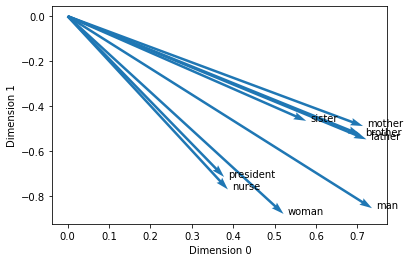

In [18]:
# plotで可視化
# Embedding.plotと使い方は同じ
embeddings.plot()

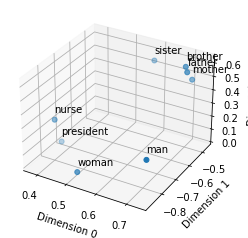

In [20]:
# 3次元可視化
embeddings.plot_3d()
plt.show()

In [21]:
# x軸を0次元目、y軸を1次元目として可視化
embeddings.plot_interactive()

alt.LayerChart(...)

In [22]:
# x軸をman、y軸をwomanとして可視化
embeddings.plot_interactive("man", "woman")

alt.LayerChart(...)

In [23]:
# 拡大・縮小・移動ができない代わりに、boxを作成するとその範囲内の単語を表示してくれる
embeddings.plot_brush(color="is_color")

alt.HConcatChart(...)

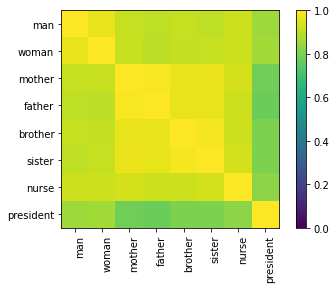

In [24]:
# コサイン類似度
embeddings.plot_similarity()

### __次元圧縮__

- transformersモジュールに以下のクラスがある

    - Pca

    - Umap

    - Tsne

- Embeggings.transformメソッドに引数として入れて使用する

    - 返り値はEmbeddings

In [25]:
# PCA
from whatlies.transformers import Pca

pca_embeddings = embeddings.transform(Pca(2))
pca_embeddings

EmbSet.pca_2()

In [26]:
pca_embeddings.plot_interactive()

alt.LayerChart(...)

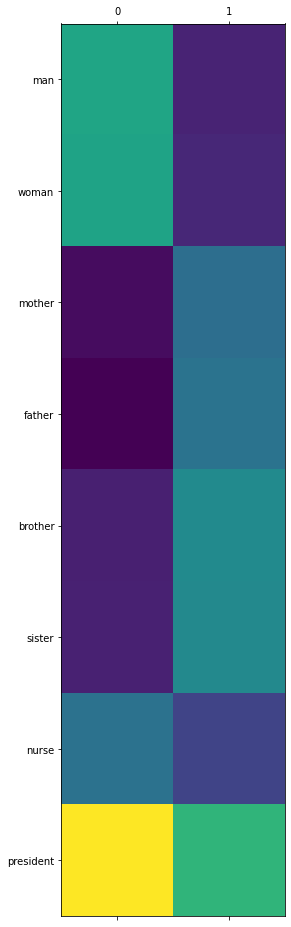

In [27]:
# 単語ベクトルをピクセル単位で可視化
# ある程度次元を減らしてから使うと良い
pca_embeddings.plot_pixels()

In [28]:
# UMAPで可視化
from whatlies.transformers import Umap

umap_embedding = embeddings.transform(Umap(2))
umap_embedding.plot_interactive()

/usr/local/lib/python3.8/dist-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

In [29]:
# t-SNEで可視化
from whatlies.transformers import Tsne

tsne_embedding = embeddings.transform(Tsne(2))
tsne_embedding.plot_interactive()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


alt.LayerChart(...)